<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/SERIES-TEMPORAIS-FEED-FORWARD/blob/main/S%C3%89RIES_TEMPORAIS_COM_REDES_NEURAIS_ALIMENTADAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series:
Start = 1880 
End = 2015 
Frequency = 1 
  [1] -0.20 -0.11 -0.10 -0.20 -0.28 -0.31 -0.30 -0.33 -0.20 -0.11 -0.37 -0.24
 [13] -0.27 -0.30 -0.31 -0.22 -0.15 -0.11 -0.28 -0.16 -0.09 -0.15 -0.28 -0.36
 [25] -0.45 -0.28 -0.23 -0.40 -0.44 -0.47 -0.43 -0.44 -0.35 -0.35 -0.16 -0.11
 [37] -0.33 -0.40 -0.26 -0.23 -0.26 -0.21 -0.27 -0.24 -0.28 -0.20 -0.09 -0.20
 [49] -0.21 -0.36 -0.13 -0.09 -0.17 -0.28 -0.13 -0.19 -0.15 -0.02 -0.02 -0.03
 [61]  0.08  0.13  0.10  0.14  0.26  0.12 -0.03 -0.04 -0.09 -0.09 -0.17 -0.06
 [73]  0.01  0.08 -0.12 -0.14 -0.20  0.03  0.06  0.03 -0.03  0.05  0.02  0.06
 [85] -0.20 -0.10 -0.05 -0.02 -0.07  0.07  0.03 -0.09  0.01  0.15 -0.08 -0.01
 [97] -0.11  0.18  0.07  0.16  0.27  0.32  0.13  0.31  0.16  0.12  0.19  0.33
[109]  0.40  0.28  0.44  0.42  0.23  0.24  0.32  0.46  0.34  0.48  0.63  0.42
[121]  0.42  0.55  0.63  0.62  0.55  0.69  0.63  0.66  0.54  0.64  0.72  0.60
[133]  0.63  0.66  0.75  0.87


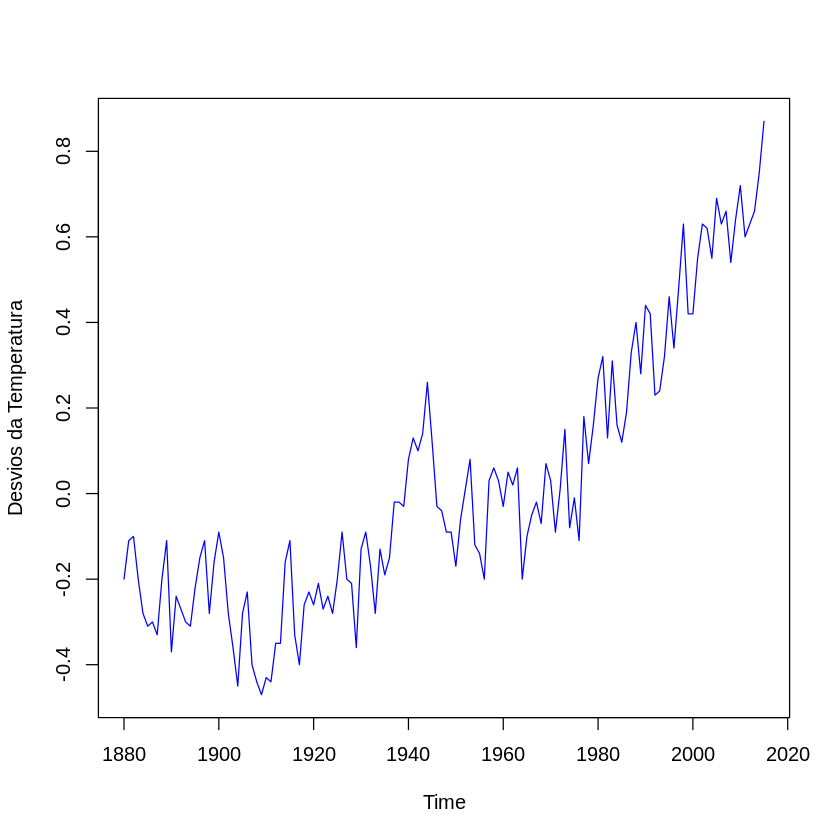

In [8]:
###################################################################
###    SÉRIES TEMPORAIS COM REDES NEURAIS ALIMENTADAS ADIANTE   ###
###           (FEED-FORWARD) COM UMA CAMADA OCULTA              ###
###################################################################

###############################################
######   Desvios da Temperatura Global   ######
###############################################

### IMPORTAÇÃO DA SÉRIE TEMPORAL

#install.packages('astsa')

library(astsa)
library(dplyr)
#?globtemp
temp_global <- ts(globtemp, start = 1880, end = 2015,
                  frequency = 1)
print(temp_global)
plot(temp_global, type="l", ylab="Desvios da Temperatura",
     col="blue")

In [9]:
#install.packages("forecast")
library(forecast)

Series: temp_global 
Model:  NNAR(19,10) 
Call:   nnetar(y = temp_global, p = 19, size = 10)

Average of 20 networks, each of which is
a 19-10-1 network with 211 weights
options were - linear output units 

sigma^2 estimated as 3.302e-08

	Ljung-Box test

data:  Residuals from NNAR(19,10)
Q* = 11.11, df = 10, p-value = 0.349

Model df: 0.   Total lags used: 10



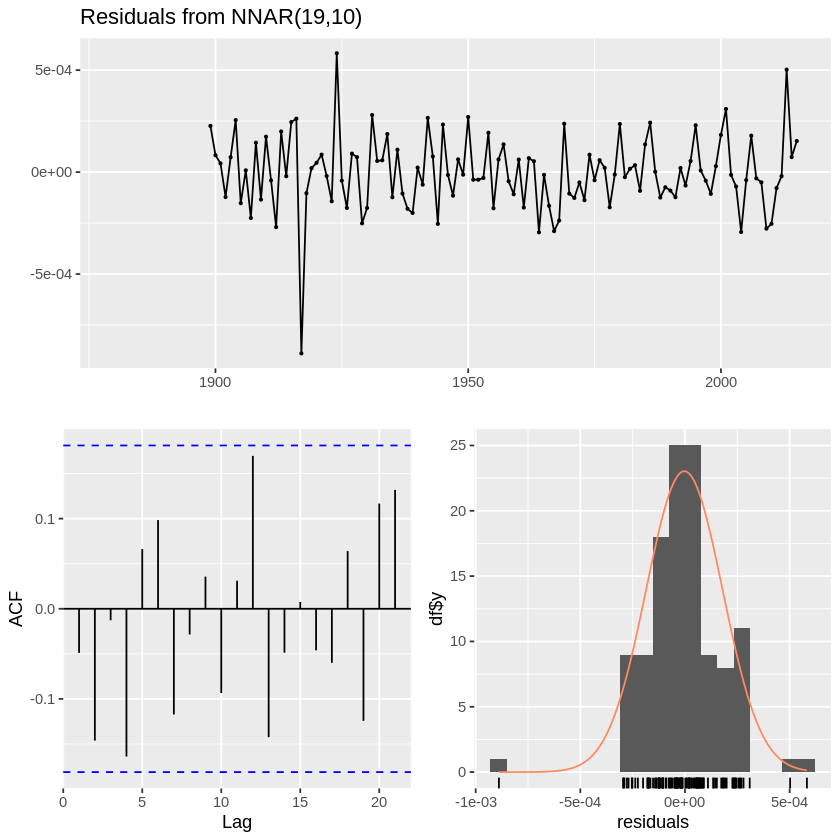

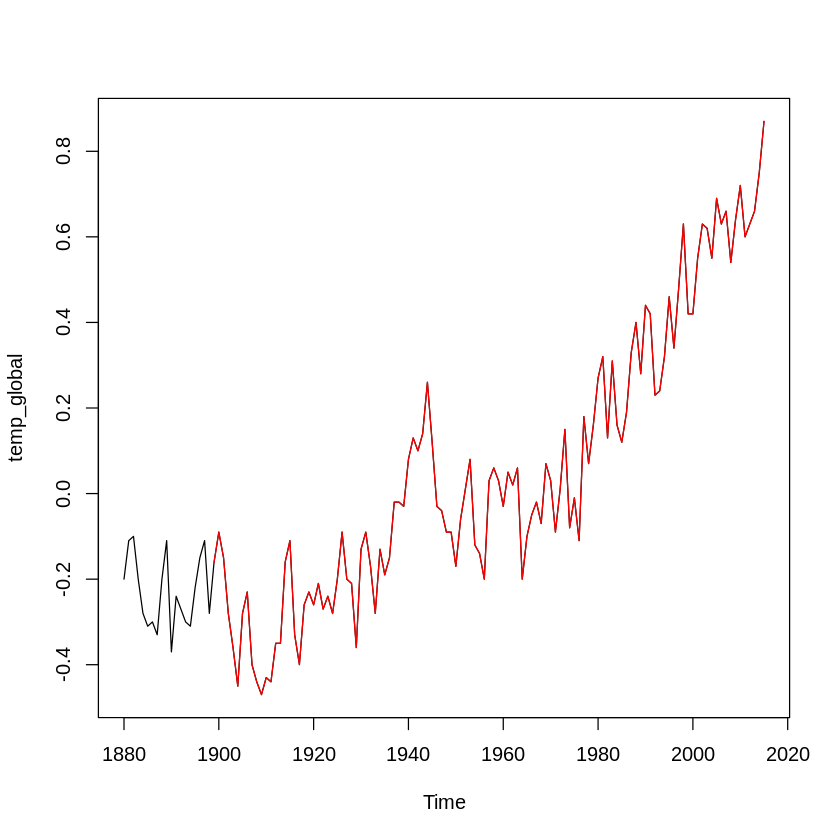

In [10]:
### CRIAÇÃO DO MODELO
modelo <- nnetar(temp_global,p = 19, size = 10)
print(modelo)

checkresiduals(modelo)

plot(temp_global)
lines(temp_global-modelo$resid, col= "red")

     Point Forecast
2016      0.7037316
2017      0.8205487
2018      0.7803592
2019      0.9242310
2020      0.8884571
2021      0.8327738
2022      0.9204521
2023      0.8250530
2024      0.8523533
2025      0.8018732
2026      0.8157162
2027      0.9301359


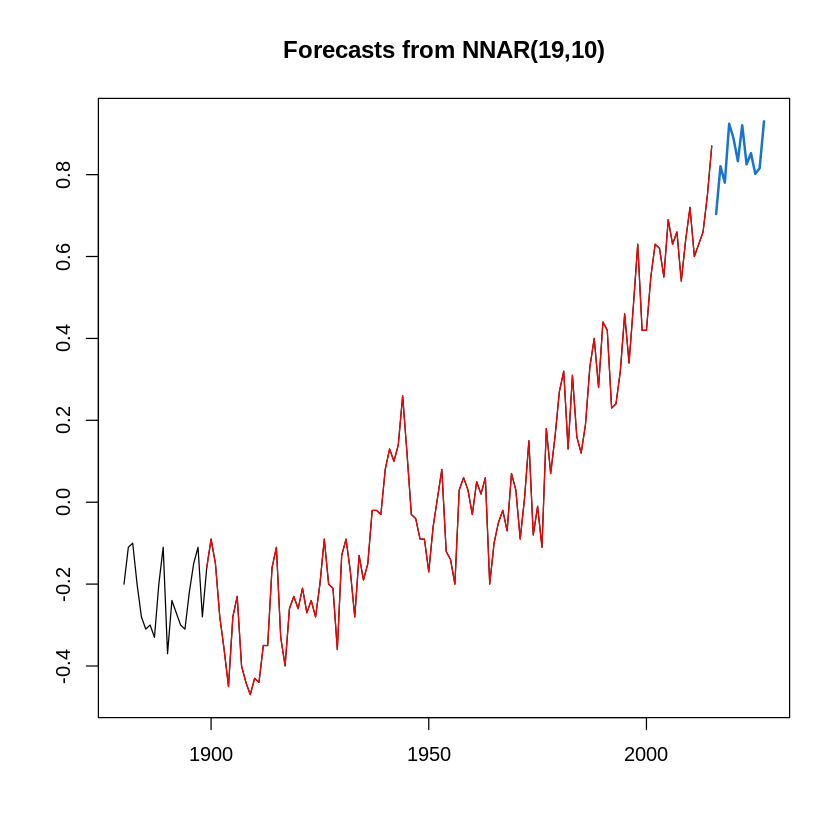

In [14]:
### PREVISÃO
previsao <- forecast(modelo, h = 12)
print(previsao)
plot(previsao)
lines(temp_global-modelo$resid, col= "red")


In [17]:
### CRIAÇÃO DE UM DATAFRAME COM VALORES REAIS E AJUSTADOS
ajuste <- fitted.values(modelo)
print(ajuste)
metrica <- as.data.frame(ajuste)
View(metrica)


Time Series:
Start = 1880 
End = 2015 
Frequency = 1 
  [1]           NA           NA           NA           NA           NA
  [6]           NA           NA           NA           NA           NA
 [11]           NA           NA           NA           NA           NA
 [16]           NA           NA           NA           NA -0.160226468
 [21] -0.090082995 -0.150042388 -0.279877517 -0.360072642 -0.450254939
 [26] -0.279847434 -0.230008521 -0.399775049 -0.440143888 -0.469865175
 [31] -0.430173386 -0.439959097 -0.349730382 -0.350199081 -0.159979828
 [36] -0.110245078 -0.330261894 -0.399111004 -0.259896506 -0.230019315
 [41] -0.260045511 -0.210085587 -0.269980416 -0.239857029 -0.280582536
 [46] -0.199958131 -0.089824157 -0.200090399 -0.210073222 -0.359748731
 [51] -0.129824221 -0.090279685 -0.170054483 -0.280057889 -0.130186571
 [56] -0.189876536 -0.150109806 -0.019894940 -0.019819860 -0.029799757
 [61]  0.079978047  0.130061604  0.099734306  0.139923429  0.260253911
 [66]  0.119766923 -0.0

x
<ts>
NA
NA
NA
NA
NA
NA
NA
NA
NA


In [19]:
metrica <- rename(metrica, valores_ajustados = x)
metrica$valores_reais <- temp_global
metrica <- slice(metrica, -c(1:19))


In [ ]:
### MÉTRICAS DE DESEMPENHO ###
#install.packages('MLmetrics')
library(MLmetrics)


In [21]:
# ERRO MÉDIO ABSOLUTO (MAE)
MAE(metrica$valores_ajustados, metrica$valores_reais)

[1] 0.0001330287

In [22]:
# ERRO QUADRÁTICO MÉDIO (MSE)
MSE(metrica$valores_ajustados, metrica$valores_reais)


[1] 3.301949e-08

In [23]:
# RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)
RMSE(metrica$valores_ajustados, metrica$valores_reais)

[1] 0.0001817127

In [24]:
# SEPARANDO EM DADOS DE TREINO E TESTE

# Desvios da Temperatura Global

# TREINO
temp_treino <- ts(globtemp, start = 1880, end = 2000,
                  frequency = 1)
print(temp_treino)

Time Series:
Start = 1880 
End = 2000 
Frequency = 1 
  [1] -0.20 -0.11 -0.10 -0.20 -0.28 -0.31 -0.30 -0.33 -0.20 -0.11 -0.37 -0.24
 [13] -0.27 -0.30 -0.31 -0.22 -0.15 -0.11 -0.28 -0.16 -0.09 -0.15 -0.28 -0.36
 [25] -0.45 -0.28 -0.23 -0.40 -0.44 -0.47 -0.43 -0.44 -0.35 -0.35 -0.16 -0.11
 [37] -0.33 -0.40 -0.26 -0.23 -0.26 -0.21 -0.27 -0.24 -0.28 -0.20 -0.09 -0.20
 [49] -0.21 -0.36 -0.13 -0.09 -0.17 -0.28 -0.13 -0.19 -0.15 -0.02 -0.02 -0.03
 [61]  0.08  0.13  0.10  0.14  0.26  0.12 -0.03 -0.04 -0.09 -0.09 -0.17 -0.06
 [73]  0.01  0.08 -0.12 -0.14 -0.20  0.03  0.06  0.03 -0.03  0.05  0.02  0.06
 [85] -0.20 -0.10 -0.05 -0.02 -0.07  0.07  0.03 -0.09  0.01  0.15 -0.08 -0.01
 [97] -0.11  0.18  0.07  0.16  0.27  0.32  0.13  0.31  0.16  0.12  0.19  0.33
[109]  0.40  0.28  0.44  0.42  0.23  0.24  0.32  0.46  0.34  0.48  0.63  0.42
[121]  0.42


In [25]:
# TESTE
library(dplyr)
temp_teste <- globtemp
print(temp_teste)


Time Series:
Start = 1880 
End = 2015 
Frequency = 1 
  [1] -0.20 -0.11 -0.10 -0.20 -0.28 -0.31 -0.30 -0.33 -0.20 -0.11 -0.37 -0.24
 [13] -0.27 -0.30 -0.31 -0.22 -0.15 -0.11 -0.28 -0.16 -0.09 -0.15 -0.28 -0.36
 [25] -0.45 -0.28 -0.23 -0.40 -0.44 -0.47 -0.43 -0.44 -0.35 -0.35 -0.16 -0.11
 [37] -0.33 -0.40 -0.26 -0.23 -0.26 -0.21 -0.27 -0.24 -0.28 -0.20 -0.09 -0.20
 [49] -0.21 -0.36 -0.13 -0.09 -0.17 -0.28 -0.13 -0.19 -0.15 -0.02 -0.02 -0.03
 [61]  0.08  0.13  0.10  0.14  0.26  0.12 -0.03 -0.04 -0.09 -0.09 -0.17 -0.06
 [73]  0.01  0.08 -0.12 -0.14 -0.20  0.03  0.06  0.03 -0.03  0.05  0.02  0.06
 [85] -0.20 -0.10 -0.05 -0.02 -0.07  0.07  0.03 -0.09  0.01  0.15 -0.08 -0.01
 [97] -0.11  0.18  0.07  0.16  0.27  0.32  0.13  0.31  0.16  0.12  0.19  0.33
[109]  0.40  0.28  0.44  0.42  0.23  0.24  0.32  0.46  0.34  0.48  0.63  0.42
[121]  0.42  0.55  0.63  0.62  0.55  0.69  0.63  0.66  0.54  0.64  0.72  0.60
[133]  0.63  0.66  0.75  0.87


In [26]:
temp_teste <- as.data.frame(temp_teste)
View(temp_teste)
temp_teste <- slice(temp_teste, c(122:136))

x
<ts>
-0.20
-0.11
-0.10
-0.20
-0.28
-0.31
-0.30
-0.33
-0.20


In [27]:
# Criação do Modelo
modelo2 <- nnetar(temp_treino,p = 19, size = 10)
print(modelo2)

Series: temp_treino 
Model:  NNAR(19,10) 
Call:   nnetar(y = temp_treino, p = 19, size = 10)

Average of 20 networks, each of which is
a 19-10-1 network with 211 weights
options were - linear output units 

sigma^2 estimated as 1.208e-08


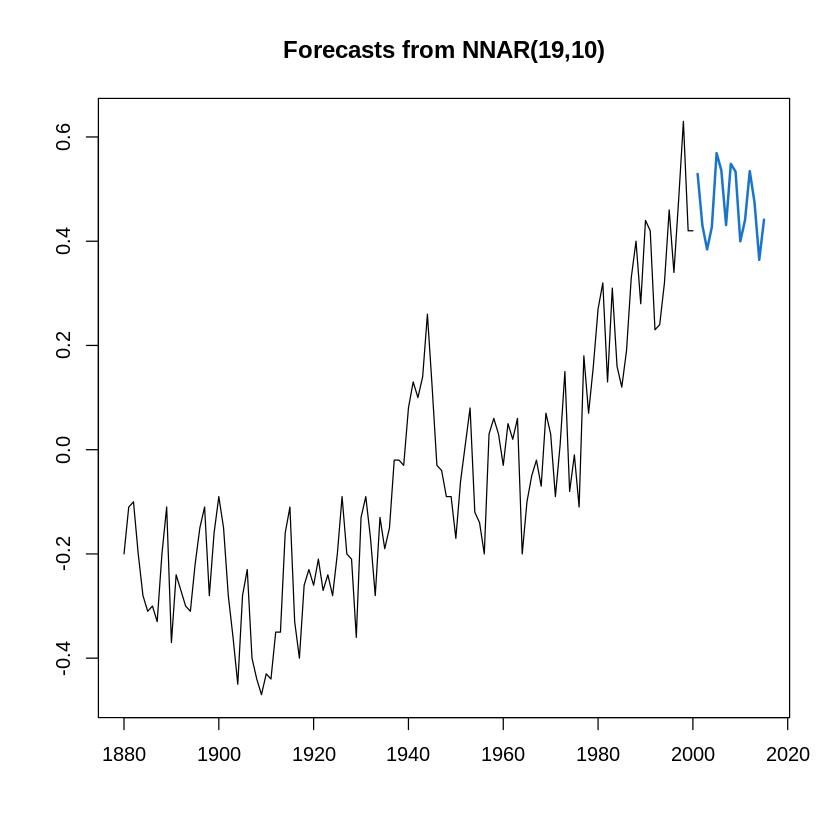

In [28]:
### PREVISÃO
previsao2 <- forecast(modelo2, h=15)
plot(previsao2)

In [29]:
### CRIAÇÃO DE UM DATAFRAME COM VALORES REAIS E PREVISTOS
previsao2 <- as.data.frame(previsao2)
View(previsao2)

,Point Forecast
,<dbl>
2001,0.5290761
2002,0.4304525
2003,0.3842610
2004,0.4274054
2005,0.5689211
2006,0.5358715
2007,0.4310336
2008,0.5484466
2009,0.5335441


In [30]:
### MÉTRICAS DE DESEMPENHO ###
# Juntar dois dataframes
metrica2 <- bind_cols(previsao2,temp_teste)
View(metrica2)

,Point Forecast,x
,<dbl>,<dbl>
2001,0.5290761,0.55
2002,0.4304525,0.63
2003,0.3842610,0.62
2004,0.4274054,0.55
2005,0.5689211,0.69
2006,0.5358715,0.63
2007,0.4310336,0.66
2008,0.5484466,0.54
2009,0.5335441,0.64


In [31]:
metrica2 <- rename(metrica2, previsao = 'Point Forecast')
metrica2 <- rename(metrica2, real = x)

glimpse(metrica2)

Rows: 15
Columns: 2
$ previsao <dbl> 0.5290761, 0.4304525, 0.3842610, 0.4274054, 0.5689211, 0.5358…
$ real     <dbl> 0.55, 0.63, 0.62, 0.55, 0.69, 0.63, 0.66, 0.54, 0.64, 0.72, 0…


In [32]:
library(MLmetrics)
# ERRO MÉDIO ABSOLUTO (MAE)
MAE(metrica2$previsao, metrica2$real)

[1] 0.1808754

In [33]:
# ERRO QUADRÁTICO MÉDIO (MSE)
MSE(metrica2$previsao, metrica2$real)

[1] 0.04682245

In [34]:
# RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)
RMSE(metrica2$previsao, metrica2$real)

[1] 0.2163849